<a href="https://www.kaggle.com/code/chaitanyachandra/04-ml-polynomial-linear-regression?scriptVersionId=263297734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Polynomial Regression

* for modeling **non-linear relationships** between input features and the target.

\$
\hat{y} = b\_0 + b\_1 x + b\_2 x^2 + b\_3 x^3 + \dots + b\_n x^n
\$

### Explanation:

* **\$\hat{y}\$** → The **predicted output** (dependent variable)
* **\$x\$** → The **input feature** (independent variable)
* **\$b\_0\$** → The **intercept (constant term)**
* **\$b\_1, b\_2, \dots, b\_n\$** → The **coefficients** for each power of \$x\$
* **Error (residual)** = \$y - \hat{y}\$

This is an extension of:

\$
y = mx + b
\$

but instead of being restricted to a **straight line**, polynomial regression allows **curved relationships** by including higher powers of \$x\$.

### What it means:

It tells us that the output depends on **non-linear combinations of the input variable(s)**.
Still, the model is **linear in parameters** (coefficients \$b\_i\$), but **non-linear in input \$x\$.**


### Example: Chocolate Sales Over Time

Suppose the sale of chocolates doesn’t grow linearly with time but follows a curve.
Imagine the sales formula is:

\$
\text{Sales (Y)} = 2 + 3x + 0.5x^2
\$

Where:

* \$x\$ = number of months
* \$Y\$ = chocolate sales


### Let’s try with some values:

| x (Months) | Y = 2 + 3x + 0.5x² | Sales |
| ---------- | ------------------ | ----- |
| 0          | 2 + 0 + 0 = 2      | 2     |
| 1          | 2 + 3 + 0.5 = 5.5  | 5.5   |
| 2          | 2 + 6 + 2 = 10     | 10    |
| 3          | 2 + 9 + 4.5 = 15.5 | 15.5  |
| 4          | 2 + 12 + 8 = 22    | 22    |

So instead of a **straight line**, the sales grow following a **parabolic curve**.


### What this means:

* Each **power of \$x\$ contributes differently**.
* The quadratic term (\$x^2\$) introduces curvature.
* The model can capture more complex patterns compared to a straight line.

---

### Solve:

* You are given a [Position\_Salaries.csv dataset](https://www.kaggle.com/datasets/chaitanyachandra/data-csv?select=Position_Salaries.csv) containing the following columns:

  * Position (string, e.g., "Business Analyst", "CEO")
  * Level (numeric: 1 to 10, represents seniority level)
  * Salary (numeric, target variable)

* Build a **Polynomial Regression model** to predict Salary from Level.

* Tasks:

  * Load and explore the dataset.
  * Select `Level` as the independent variable and `Salary` as the dependent variable.
  * Train two models:
    1. Linear Regression
    2. Polynomial Regression (degree = 4)
  * Compare results by plotting both predictions.
  * Create a numpy array with predicted and real data for Simple linear regression and Polynomial regression.
  * predict with Simple linear regression and Polynomial regression with 6.5 level.

In [1]:
# import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data-set
dataset = pd.read_csv("/kaggle/input/data-csv/Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
# decouple independent and dependent col
independent_x = dataset.iloc[:, 1:-1].values
dependent_y = dataset.iloc[:, -1].values
independent_x, dependent_y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [4]:
# split train and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent_x, dependent_y, random_state=0, test_size=0.2)
x_train, x_test, y_train, y_test

(array([[ 5],
        [10],
        [ 2],
        [ 7],
        [ 8],
        [ 4],
        [ 1],
        [ 6]]),
 array([[3],
        [9]]),
 array([ 110000, 1000000,   50000,  200000,  300000,   80000,   45000,
         150000]),
 array([ 60000, 500000]))

In [5]:
# train linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(independent_x, dependent_y)

LinearRegression()

In [6]:
# train polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=4)
poly_x = pr.fit_transform(independent_x)
lr2 = LinearRegression()
lr2.fit(poly_x, dependent_y)

LinearRegression()

In [7]:
# numpy array with predicted and real data for Simple linear regression.
predicted_x = lr.predict(independent_x)
lr_array = np.concatenate((independent_x.reshape(len(independent_x), 1), predicted_x.reshape(len(predicted_x), 1), dependent_y.reshape(len(dependent_y), 1)), axis=1)
# predicted_x
pd.DataFrame(lr_array, columns=["level", "predicted","actual"])

,level,predicted,actual
0,1.0,-114454.545455,45000.0
1,2.0,-33575.757576,50000.0
2,3.0,47303.030303,60000.0
3,4.0,128181.818182,80000.0
4,5.0,209060.606061,110000.0
5,6.0,289939.393939,150000.0
6,7.0,370818.181818,200000.0
7,8.0,451696.969697,300000.0
8,9.0,532575.757576,500000.0
9,10.0,613454.545455,1000000.0


In [8]:
# numpy array with predicted and real data for Polynomial regression.
predicted_y = lr2.predict(pr.transform(independent_x))
pr_array = np.concatenate((independent_x.reshape(len(independent_x), 1) ,predicted_y.reshape(len(predicted_y), 1), dependent_y.reshape(len(dependent_y), 1)), axis=1)
# predicted_y

pd.DataFrame(pr_array, columns=["level", "predicted","actual"])

,level,predicted,actual
0,1.0,53356.643357,45000.0
1,2.0,31759.906760,50000.0
2,3.0,58642.191142,60000.0
3,4.0,94632.867133,80000.0
4,5.0,121724.941725,110000.0
5,6.0,143275.058275,150000.0
6,7.0,184003.496504,200000.0
7,8.0,289994.172494,300000.0
8,9.0,528694.638695,500000.0
9,10.0,988916.083916,1000000.0


In [9]:
# predict with Simple linear regression 
lr.predict([[6.5]])
# [[]] -- first corresponds to rows, second is corresponds to cols in array

array([330378.78787879])

In [10]:
# predict with Polynomial regression
lr2.predict(pr.transform([[6.5]]))

array([158862.45265155])

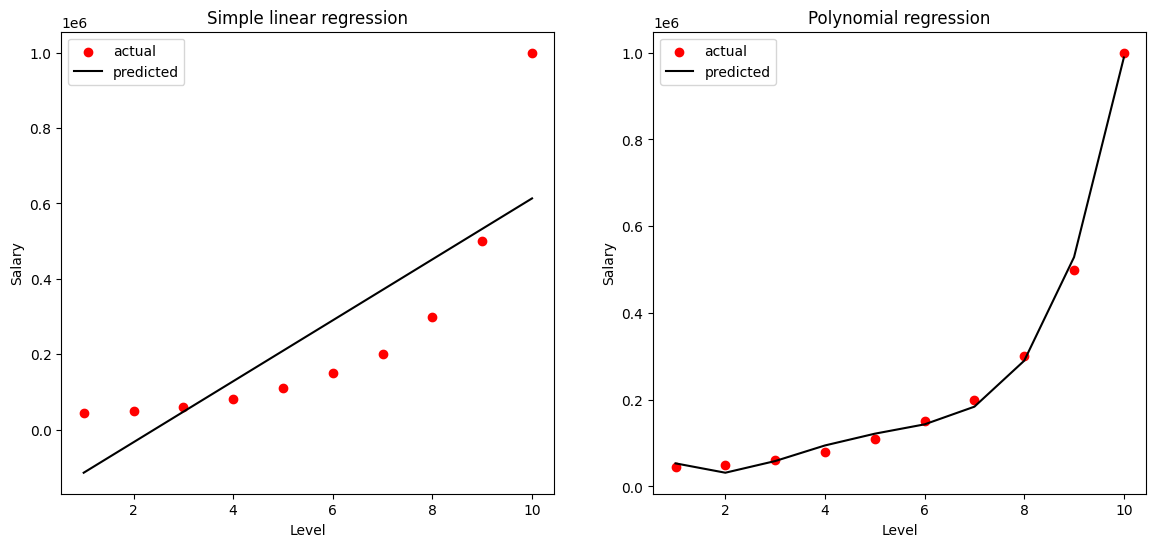

In [11]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(independent_x, dependent_y, color="red", label="actual")
plt.plot(independent_x, lr.predict(independent_x), color="black", label="predicted")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Simple linear regression")
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(independent_x, dependent_y, color="red", label="actual")
plt.plot(independent_x, lr2.predict(pr.transform(independent_x)), color="black", label="predicted")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial regression")
plt.legend()


plt.show()